# 11.1 Capstone: Data Investigation

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Utilities

In [4]:
import datetime

def generate_clean_csv(infile, outfile, debug=False):
    """
    :param infile: File to read with raw data
    :param outfile: CSV file to write once the data has been cleaned and reformatted
    """

    # Timestamp the report
    print(f'Start Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')

    # Read the file
    print('Reading file: {} ... '.format(infile), end='')
    raw_df = pd.read_csv(infile)
    print('Done: {:,d} rows, {:,d} columns'.format(raw_df.shape[0], raw_df.shape[1]))
    if debug:
        raw_df.columns    

    # Convert column names with spaces and upper-case to underscore and lower-case format
    print('... Formatting column names ... ', end='')
    raw_df.columns = raw_df.columns.str.replace(' ', '_').str.lower()
    if debug:
        raw_df.columns    
    print('Done')

    # Create two new datetime and date columns with clean dates
    # raw_df['datetime'] = pd.to_datetime(df.incident_datetime, format='%Y/%m/%d %I:%M:%S %p')
    print('... Creating timeseries columns: datetime and date ... ')
    raw_df['datetime'] = pd.to_datetime(raw_df.incident_datetime, format='mixed')
    raw_df['date'] = pd.to_datetime(raw_df.incident_date, format='mixed')
    print('...... Number of rows where the datetime conversion failed: {:,d}'.format(raw_df.datetime.isnull().sum()))
    print('...... Number of rows where the date conversion failed: {:,d}'.format(raw_df.date.isnull().sum()))
    print('...... Timespan: {} - {}'.format(raw_df.datetime.min(), raw_df.datetime.max()))    
    print('... Done')

    # set datetime as index to create the timeseries
    print('... Setting index to datetime ... ', end='')
    raw_df = raw_df.set_index('datetime')
    print('Done')
    
    print(f'\nCurrent Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')

    if debug:
        raw_df.info()
    
    # Write the file
    print('... Writing file: {} {} ... '.format(outfile, raw_df.shape), end='')
    raw_df.to_csv(outfile)
    print('Done')

    print('Done')
    print(f'\nEnd Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')


In [5]:
def generate_sample_file(infile, outfile, frac=0.1, random_state=42):
    """
    Generates an output file containg samples from the input based on frac and random_state
    
    :param infile: CSV file to read data from
    :param outfile: CSV file to write once the data has been cleaned and reformatted
    :param frac: Fraction of the file to include in sampling
    :param random_state: Control the randomization
    :return: Returns DataFrame with index set to the datetime column
    """
    # Read the file
    print('Reading file: {} ... '.format(infile), end='')
    in_df = pd.read_csv(infile)
    print('Done: {:,d} rows, {:,d} columns'.format(in_df.shape[0], in_df.shape[1]))

    out_df = in_df.sample(frac=frac, random_state=random_state)
    
    # Write the file
    print('Writing file: {} {} ... '.format(outfile, out_df.shape), end='')
    out_df.to_csv(outfile)
    print('Done')

In [6]:
def get_clean_data_from_csv(infile):
    """
    :param infile: CSV file to read data from
    :return: Returns DataFrame with index set to the datetime column
    """
    # Read the file
    print('Reading file: {} ... '.format(infile), end='')
    clean_df = pd.read_csv(infile)
    print('Done: {:,d} rows, {:,d} columns'.format(clean_df.shape[0], clean_df.shape[1]))
    
    # Converting datetime and date to timeseries ...
    print('... Converting datetime and date to timeseries ... ', end='')
    clean_df.datetime = pd.to_datetime(clean_df.datetime)
    clean_df.date = pd.to_datetime(clean_df.date)
    print('Done')

    # set datetime as index to create the timeseries
    print('... Setting index to datetime ... ', end='')
    clean_df = clean_df.set_index('datetime')
    print('Done')

    print('Done')

    return clean_df


In [7]:
def graph_features(df, nrows, ncols, figsize=(7,7)):
    """
    Graph all the DataFrame columns as subplots to quickly visualize the features 
    :param df: DataFrame to iterate on
    :param nrows: Number of rows in subplot
    :param ncols: Number of cols in subplot
    :param fisize: list containing (widht, height)
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # Flatten the axes array (makes it easier to iterate over)
    axes = axes.flatten()
    
    # Loop through each column and plot a histogram
    for i, column in enumerate(df.columns):
        
        # Add the histogram
        df[column].hist(ax=axes[i], # Define on which ax we're working on
                        edgecolor='white', # Color of the border
                        color='#69b3a2' # Color of the bins
                       )
        
        # Add title and axis label
        axes[i].set_title(f'{column}') 
        axes[i].set_xlabel(column) 
        axes[i].set_ylabel('Frequency') 
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## The Data

In [9]:
file_raw_data = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
file_clean_data = '../data/incidents_clean.csv'
file_sample_10_data = '../data/incidents_sample_10.csv'

In [10]:
# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER

# generate_clean_csv(file_raw_data, file_clean_data, debug=True)

In [11]:
# Uncomment to generate a 10% sample file

# generate_sample_file(file_clean_data, file_sample_10_data, frac=0.1, random_state=42)

In [12]:
clean_df = get_clean_data_from_csv(file_sample_10_data)

Reading file: ../data/incidents_sample_10.csv ... Done: 88,717 rows, 38 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
Done


In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88717 entries, 2022-02-10 07:59:00 to 2021-07-09 00:22:00
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Unnamed: 0                                            88717 non-null  int64         
 1   incident_datetime                                     88717 non-null  object        
 2   incident_date                                         88717 non-null  object        
 3   incident_time                                         88717 non-null  object        
 4   incident_year                                         88717 non-null  int64         
 5   incident_day_of_week                                  88717 non-null  object        
 6   report_datetime                                       88717 non-null  object        
 7   row_id                                   

In [14]:
clean_df.head(2)

,Unnamed: 0,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,...,point,neighborhoods,esncag_-_boundary_file,central_market/tenderloin_boundary_polygon_-_updated,civic_center_harm_reduction_project_boundary,hsoc_zones_as_of_2018-06-05,invest_in_neighborhoods_(iin)_areas,current_supervisor_districts,current_police_districts,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-10 07:59:00,308322,2022/02/10 07:59:00 AM,2022/02/10,07:59,2022,Thursday,2022/02/10 08:10:00 AM,112051707041,1120517,220024353,...,POINT (-122.46807726285189 37.72897476627766),67.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0,2022-02-10
2022-11-17 23:30:00,371699,2022/11/17 11:30:00 PM,2022/11/17,23:30,2022,Thursday,2022/11/19 03:23:00 PM,121645375000,1216453,220797237,...,POINT (-122.42166247826907 37.76257883049033),53.0,NaN,NaN,NaN,3.0,NaN,5.0,3.0,2022-11-17


In [15]:
clean_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,88717.0,NaN,NaN,NaN,443011.193007,0.0,220783.0,443194.0,664932.0,887170.0,256082.521158
incident_datetime,88717,77103,2021/01/01 12:00:00 AM,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_date,88717,2443,2019/07/26,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_time,88717,1440,00:00,2889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_year,88717.0,NaN,NaN,NaN,2020.739576,2018.0,2019.0,2021.0,2022.0,2024.0,1.939964
incident_day_of_week,88717,7,Friday,13517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
report_datetime,88717,85158,2018/06/27 07:30:00 AM,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
row_id,88717.0,NaN,NaN,NaN,102266931186.091995,61871464020.0,82325309024.0,102196709250.0,122285612030.0,142247874000.0,23117033883.249496
incident_id,88717.0,NaN,NaN,NaN,1022669.065354,618714.0,823253.0,1021967.0,1222856.0,1422478.0,231170.343796
incident_number,88717.0,NaN,NaN,NaN,208978657.440592,1819873.0,190618599.0,210249486.0,226148905.0,981081925.0,19907109.242436


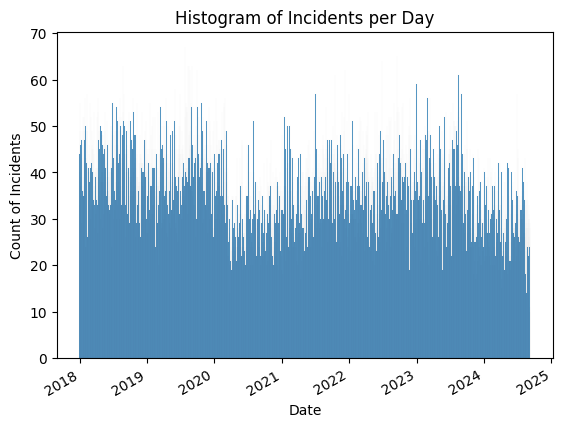

In [16]:
sns.histplot(data=clean_df, x='date', discrete=True)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.title('Histogram of Incidents per Day')
plt.show()

In [17]:
clean_df.resolution.value_counts(normalize=True)

resolution
Open or Active          0.803645
Cite or Arrest Adult    0.188656
Unfounded               0.005005
Exceptional Adult       0.002694
Name: proportion, dtype: float64

In [18]:
temp_copy = clean_df.copy()

temp_copy = temp_copy.drop(columns=['report_datetime', 'row_id', 
                   'incident_id', 'incident_number', 'cad_number', 
                   'latitude', 'longitude', 'point',  'esncag_-_boundary_file',
                   'central_market/tenderloin_boundary_polygon_-_updated',
                   'civic_center_harm_reduction_project_boundary',
                   'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas']) 

In [19]:
temp = temp_copy.head(1000)

In [20]:
temp.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

/var/folders/p0/_b24zpks5fd7l2cg_53cspsh0000gn/T/ipykernel_31384/3091830366.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


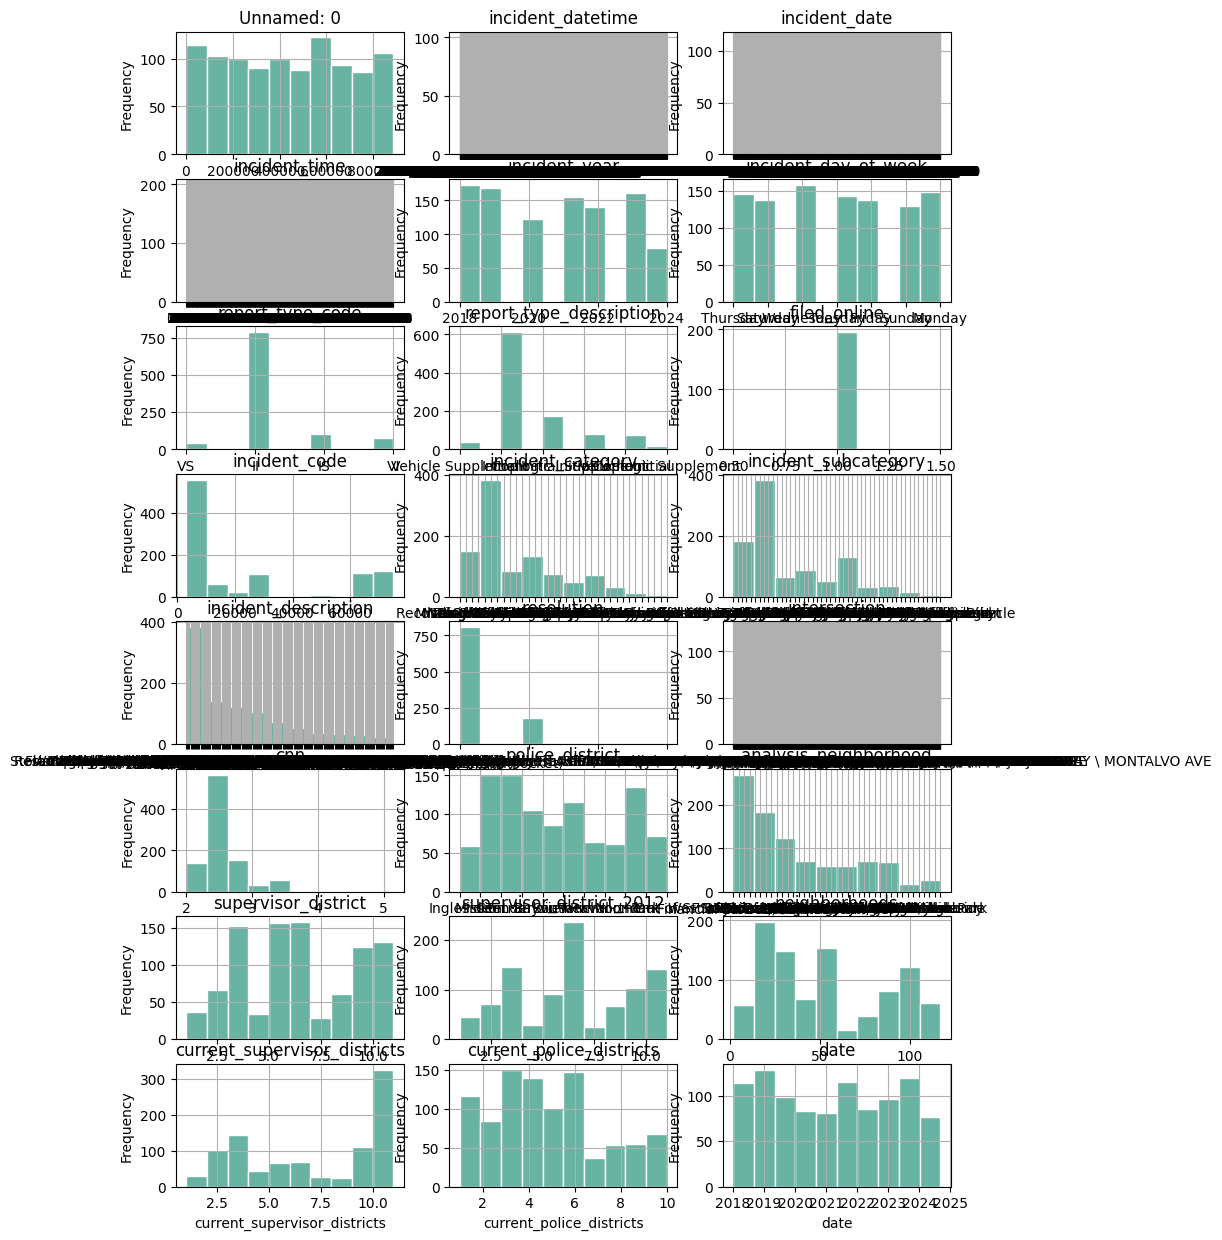

In [21]:
graph_features(temp, 8, 3, figsize=(10, 15))

In [22]:
# feature_df = temp[['incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week']]
# graph_features(feature_df, 3, 2)

In [23]:
temp_copy.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [24]:
temp_copy.incident_description.head(5)

datetime
2022-02-10 07:59:00                Vehicle, Recovered, Auto
2022-11-17 23:30:00                            Found Person
2023-12-23 22:50:00                         Found  Property
2018-09-05 13:20:00    Methamphetamine, Possession For Sale
2022-01-22 10:28:00                Vehicle, Recovered, Auto
Name: incident_description, dtype: object

In [25]:
temp_copy.shape

(88717, 24)

In [26]:
temp_copy.incident_description.value_counts()

incident_description
Theft, From Locked Vehicle, >$950            10659
Malicious Mischief, Vandalism to Property     2894
Battery                                       2693
Lost Property                                 2667
Vehicle, Stolen, Auto                         2650
                                             ...  
Homicide, Drive-by                               1
Assault, Mayhem, W/ Gun                          1
Throwing Injurious Substance on Highway          1
Loitering near ATM                               1
Assault, Att. Mayhem, W/ Force                   1
Name: count, Length: 657, dtype: int64

In [27]:
temp_copy.incident_category.value_counts()

incident_category
Larceny Theft                                   26472
Other Miscellaneous                              6039
Malicious Mischief                               5935
Assault                                          5512
Non-Criminal                                     5207
Motor Vehicle Theft                              5009
Burglary                                         4929
Recovered Vehicle                                3534
Fraud                                            2857
Warrant                                          2700
Lost Property                                    2667
Drug Offense                                     2256
Robbery                                          1945
Missing Person                                   1887
Suspicious Occ                                   1811
Disorderly Conduct                               1523
Offences Against The Family And Children         1201
Miscellaneous Investigation                      1032
Traffic Vi